In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:/Users/ramya/Downloads/50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
#checking weather dataset have null values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
#checking weather dataset have duplicated values
data.duplicated().sum()

0

In [8]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [9]:
#find out numerical and categorical features for data set

numerical_features=[feature for feature in data.columns if data[feature].dtype!='O']
categorical_features=[feature for feature in  data.columns if  data[feature].dtype=='O' and feature!='Profit']

print('categorical features: ''\n',categorical_features)
print('\n')
print('numerical features: ''\n',numerical_features)

categorical features: 
 ['State']


numerical features: 
 ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']


<AxesSubplot:xlabel='count', ylabel='State'>

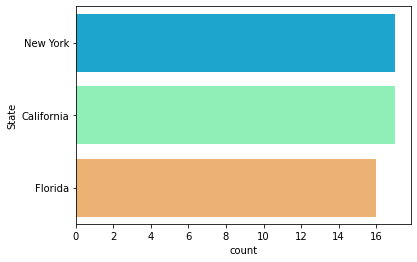

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.countplot(y='State', data=data, palette="rainbow")

In [11]:
#Target Variable Analysis
data['Profit'].value_counts()

192261.83    1
89949.14     1
105008.31    1
103282.38    1
101004.64    1
99937.59     1
97483.56     1
97427.84     1
96778.92     1
96712.80     1
96479.51     1
90708.19     1
81229.06     1
191792.06    1
81005.76     1
78239.91     1
77798.83     1
71498.49     1
69758.98     1
65200.33     1
64926.08     1
49490.75     1
42559.73     1
35673.41     1
105733.54    1
107404.34    1
108552.04    1
108733.99    1
191050.39    1
182901.99    1
166187.94    1
156991.12    1
156122.51    1
155752.60    1
152211.77    1
149759.96    1
146121.95    1
144259.40    1
141585.52    1
134307.35    1
132602.65    1
129917.04    1
126992.93    1
125370.37    1
124266.90    1
122776.86    1
118474.03    1
111313.02    1
110352.25    1
14681.40     1
Name: Profit, dtype: int64

In [13]:
#Data Prepocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [14]:
label_encoder = LabelEncoder()

In [15]:
#Frequency of Catagorical Variable
categorical_features=[feature for feature in  data.columns if  data[feature].dtype=='O' and feature!='Profit']
for feature in categorical_features:
    freq=data[feature].value_counts().rename_axis(feature).reset_index(name='frequency')
    print('\n')
    print(freq)



        State  frequency
0    New York         17
1  California         17
2     Florida         16


In [16]:
#Transforming formation_id
data['State'] = label_encoder.fit_transform(data['State'])  
data['State'].unique()
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
